##   Exploratory Data Analysis (EDA) - Ames Housing dataset


Un EDA, o Análisis Exploratorio de Datos, es una fase crucial en cualquier proyecto de Machine Learning. En resumen, es el proceso de investigar y comprender los datos con los que trabajamos antes de aplicar cualquier modelo predictivo o algoritmo de machine learning.
Este notebook contiene la estructura básica de un EDA aplicado al Ames Housing dataset.

El dataset **[Ames Housing dataset](https://www.kaggle.com/competitions/home-data-for-ml-course)** se obtuvo de Kaggle, de Prices Competition for Kaggle Learn Users. Dicho dataset consta de 79 variables que describen varios aspectos de las casas residenciales en Ames, Iowa.

### **Instrucciones**
 El objetivo que se plantea en el EDA es determinar las variables que podrían tener más relevancia en la futura predicción de la variable ```SalePrice``` (Precio en dólares de cada propiedad).

#### 1. Familiarizate con los archivos dentro del directorio `dataset/`:

¿Qué archivos usarás para el EDA?

- "train.csv"-> es la base de datos que voy a usar para el EDA. Acá están todos los atributos, incluido el precio 'SalePrice'.
- "test.csv" y "sample_submission.csv" -> acá están los datos para el testing, por lo que no deberían usarse para el EDA. En "sample_submission.csv" están los precios de los datos de testing.
- "data_description.txt" -> tiene una descripcion de cada variable.

#### 2. Carga los archivos necesarios en dataframes utilizando la librería `pandas`
Teniendo el dataframe (o los dataframes) con los datos cargados, utiliza funciones de la librería `pandas` para:
- Visualizar las primeras filas del dataframe.
- Obtener información del dataframe (utiliza la función `DataFrame.info()`).
- Obtener una primera descripción estadística de las columnas numéricas.

In [74]:
import pandas as pd

## Información del archivo "train.csv"
df_train=pd.read_csv('dataset/train.csv')
print(df_train.head())
print('----------------')
print('-----INFO:------')
print(df_train.info())
print('----------------')
print('-----STATS:-----')
print(df_train.iloc[:,1:].describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

"train.csv" tiene 80 columnas, de distintos dtype, numericos (enteros y flotantes) y strings.
Primer columna es el ID (dtype: entero) y el resto son atributos.

#### 3. Limpia el (los) DataFrame(s) de valores nulos.
Pero para eso, antes debes:
##### 3.1 Contar los valores nulos por columna e imprimir de mayor a menor ese listado.


In [75]:
print(df_train.isnull().sum().sort_values(ascending=False).iloc[0:20])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64


##### 3.2 Verificar si hay valores nulos en la columna target `SalePrice`.

In [76]:
print(df_train.isnull().sum()['SalePrice']) # cantidad de valores nulos en la columna "SalePrice"

0


SalePrice no tiene valores nulos.

##### 3.3 En base a estos resultados responde las siguientes preguntas:
- 3.3.1 ¿Eliminarías columnas? En caso afirmativo: ¿Cuáles y por qué?

Eliminaría las columnas que tienen muchos valores nulos (las primeras 5 columnas listadas en 3.1), ya que les falta mucha información.

- 3.3.2 ¿Qué harías con las variables numéricas que no tienen tantos valores nulos?

Las dejaría para hacer el EDA, ya que se puede extraer información útil. Los valores nulos se pueden reemplazar por el valor medio de la variable, para variables reales, y para variables enteras por el entero más cercano.

- 3.3.3 ¿Qué harías con las variables categóricas que no tienen tantos datos faltantes?

Se podrían reemplazar por el valor de la variable con mayor frecuencia.

#### 4. Realiza la limpieza de datos
Limpia el `DataFrame` de la manera que consideres pertinente.

In [77]:
# se eliminan las columnas con muchos valores nulos
df_train=df_train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'])
print(df_train.isnull().sum().sort_values(ascending=False).iloc[0:15])

LotFrontage     259
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
RoofStyle         0
dtype: int64


se mantuvo la variable 'LotFrontage' (longitud frontal de la propiedad) porque se presume que puede estar correlacionada con SalePrice. 

In [78]:
df_train.dtypes.unique() #tipos de variables en df_test

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [79]:
# se cuentan la cantidad de columnas donde hay valores nulos, por tipo de variable 

print('# columnas int64 con NaN =  ',(df_train.select_dtypes(include = 'int64').isnull().sum() > 0).sum())
print('# columnas float64 con NaN =',(df_train.select_dtypes(include = 'float64').isnull().sum() > 0).sum())
print('# columnas str con NaN =    ',(df_train.select_dtypes(include = 'O').isnull().sum() > 0).sum())

# columnas int64 con NaN =   0
# columnas float64 con NaN = 3
# columnas str con NaN =     11


In [80]:
# para variables reales, se reemplazan los valores nulos por el valor medio de la variable.
Ctrain_flo=df_train.select_dtypes(include = 'float64').columns
df_train[Ctrain_flo]=df_train[Ctrain_flo].fillna(df_train[Ctrain_flo].mean())
print('# columnas float64 con NaN = ',(df_train[Ctrain_flo].isnull().sum() > 0).sum()) # chequeo

# columnas float64 con NaN =  0


In [81]:
# para variables string, se reemplazan los valores nulos por el valor más frecuente de la variable.
Ctrain_str=df_train.select_dtypes(include = 'O').columns
for i in Ctrain_str:
    VMF=df_train[i].value_counts(ascending=False).iloc[0] #Valor mas frecuente
    df_train[i]=df_train[i].fillna(VMF)
print('# columnas str con NaN = ',(df_train[Ctest_str].isnull().sum() > 0).sum()) # chequeo

# columnas str con NaN =  0


#### 5. Realiza un unálisis univariable para el target `SalePrice`

##### 5.1 Visualiza la distribución de `SalePrice` usando histogramas o gráficos KDE (Kernel Density Estimation).

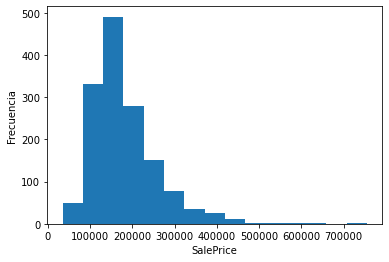

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_train['SalePrice'], bins=15, histtype='bar', orientation='vertical')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

##### 5.2 Revisa medidas estadísticas como media, mediana, rango intercuartil, etc.

In [83]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [84]:
print('mediana = ',df_train['SalePrice'].median())

mediana =  163000.0


#### 6. Realiza un análisis multivariable


##### 6.1 Correlaciones: Calcula y visualiza la "matriz" de correlación para identificar relaciones entre `SalePrice` y otras variables numéricas.

Ayuda: Puedes seleccionar un solo `dtype` en un `DataFrame` como en el siguiente ejemplo:
```numerical_columns = data.select_dtypes(include=[np.number])```

En donde las columnas con valor numérico serán aquellas que contengan un `numpy number`.

In [190]:
import numpy as np

numerical_columns = df_train.select_dtypes(include=[np.number])
#print(numerical_columns.columns)
MC = np.corrcoef (numerical_columns.T)[:,-1:]
MCp=pd.DataFrame(zip(numerical_columns.columns,MC),columns=['VarName','CorrCoef'])
print('Var vs SalePrice \n',MCp.sort_values("CorrCoef" ,ascending=False))


Var vs SalePrice 
           VarName                 CorrCoef
37      SalePrice                    [1.0]
4     OverallQual     [0.7909816005838047]
16      GrLivArea     [0.7086244776126522]
26     GarageCars     [0.6404091972583531]
27     GarageArea     [0.6234314389183616]
12    TotalBsmtSF     [0.6135805515591954]
13       1stFlrSF     [0.6058521846919146]
19       FullBath     [0.5606637627484456]
23   TotRmsAbvGrd     [0.5337231555820282]
6       YearBuilt     [0.5228973328794968]
7    YearRemodAdd     [0.5071009671113864]
8      MasVnrArea     [0.4752413167736681]
25    GarageYrBlt     [0.4701774537404797]
24     Fireplaces     [0.4669288367515278]
9      BsmtFinSF1    [0.38641980624215316]
2     LotFrontage    [0.33490085154055105]
28     WoodDeckSF     [0.3244134445681294]
14       2ndFlrSF    [0.31933380283206764]
29    OpenPorchSF    [0.31585622711605543]
20       HalfBath     [0.2841076755947829]
3         LotArea    [0.26384335387140573]
17   BsmtFullBath    [0.22712223313

Responde: 

6.1.1 ¿Cuáles son las 4 variables numéricas que tienen mayor correlación (positiva o negativa) con la variable target `SalePrice`? 

Las variables "OverallQual", "GrLivArea", "GarageCars" y "GarageArea". El CorrCoef > 0.6.

##### 6.2 Muestra una visualización de la dependencia de `SalePrice` respecto a cada una de las variables numéricas seleccionadas anteriormente.

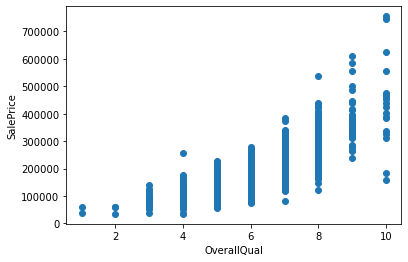

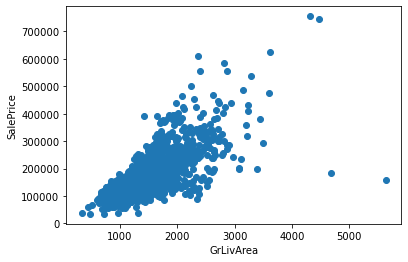

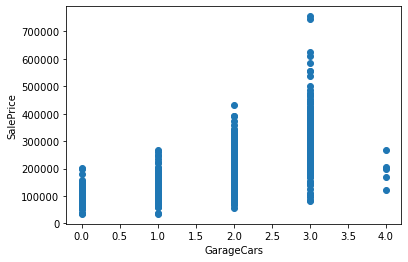

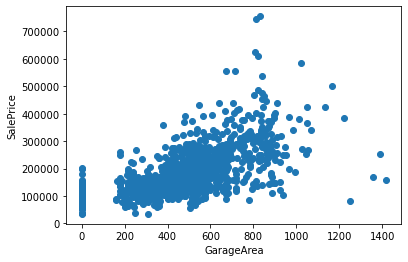

In [188]:
plt.scatter(df_train['OverallQual'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

plt.scatter(df_train['GarageCars'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show()

plt.scatter(df_train['GarageArea'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()


##### 6.3 Visualizaciones respecto a variables Categóricas

Genera visualizaciones entre la variable target `SalePrice` y las variables categóricas que consideres necesarias. 

In [189]:
print(df_train.select_dtypes(include = 'O').columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Voy a graficar las variables categóricas que supongo que pueden tener alta correlación con el precio: 'OverallCond', 'Street', 'Utilities', 'Foundation' y 'Funtional'.

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

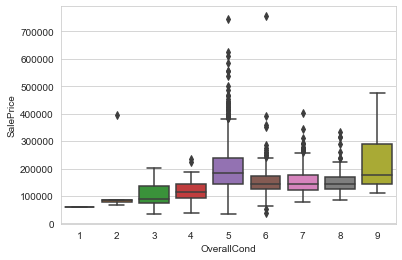

In [209]:
import seaborn as sns

sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='OverallCond',y='SalePrice')

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

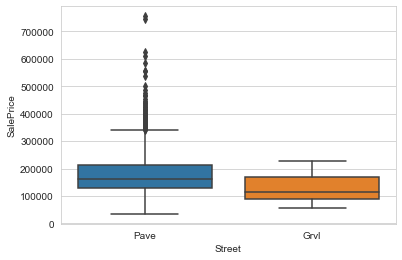

In [210]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Street',y='SalePrice')

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

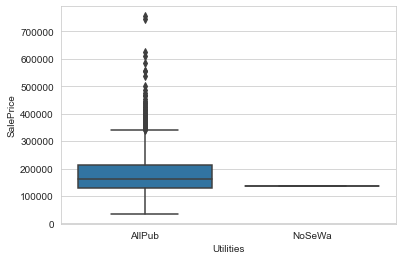

In [211]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Utilities',y='SalePrice')

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

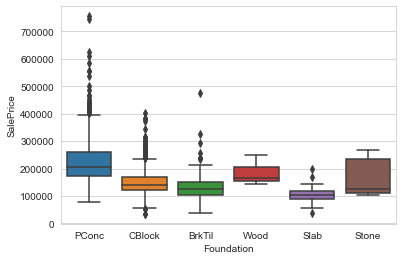

In [214]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Foundation',y='SalePrice')

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

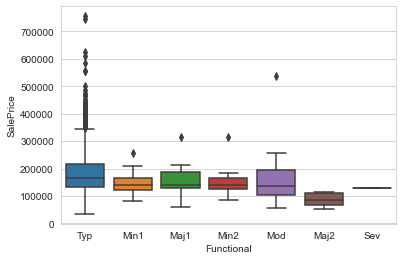

In [213]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Functional',y='SalePrice')

La variable 'OverallCondition' pareciera estar fuertemente correlacionada con .SalePrice'.

#### 6.4 Conclusiones:
- ¿Qué puedes concluir de este EDA preliminar?
- Se puede concluir que las variables de mayor correlación son: "OverallQual", "GrLivArea", "GarageCars", "GarageArea" y 'OverallCondition'.

- ¿Qué variables pueden resultar útiles para la futura implementación de un modelo predictivo para la variable `SalePrice`?
- Las variables anteriormente mencionadas.

- ¿Qué variables podrían no resultar útiles?
- Las variables que poseen un coeficiente de correlación cercano a cero.